In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df = df.drop(columns=['sex', 'cp', 'fbs', 'exang', 'slope', 'ca', 'thal', 'target'])
df

,age,trestbps,chol,restecg,thalach,oldpeak
0,52,125,212,1,168,1.0
1,53,140,203,0,155,3.1
2,70,145,174,1,125,2.6
3,61,148,203,1,161,0.0
4,62,138,294,1,106,1.9
...,...,...,...,...,...,...
1020,59,140,221,1,164,0.0
1021,60,125,258,0,141,2.8
1022,47,110,275,0,118,1.0
1023,50,110,254,0,159,0.0


In [ ]:
X = StandardScaler().fit_transform(df.values)
X

array([[-0.26843658, -0.37763552, -0.65933209,  0.89125488,  0.82132052,
        -0.06088839],
       [-0.15815703,  0.4791073 , -0.83386117, -1.00404855,  0.2559679 ,
         1.72713707],
       [ 1.71659547,  0.76468824, -1.39623266,  0.89125488, -1.04869198,
         1.30141672],
       ...,
       [-0.81983438, -1.23437834,  0.56237149, -1.00404855, -1.35311262,
        -0.06088839],
       [-0.4889957 , -1.23437834,  0.15513696, -1.00404855,  0.42992256,
        -0.91232909],
       [-0.04787747, -0.66321646, -1.12474297,  0.89125488, -1.57055593,
         0.27968789]])

In [ ]:
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
oldpeak = df['oldpeak']
trestbps = df['trestbps']
oldpeak

0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
       ... 
1020    0.0
1021    2.8
1022    1.0
1023    0.0
1024    1.4
Name: oldpeak, Length: 1025, dtype: float64

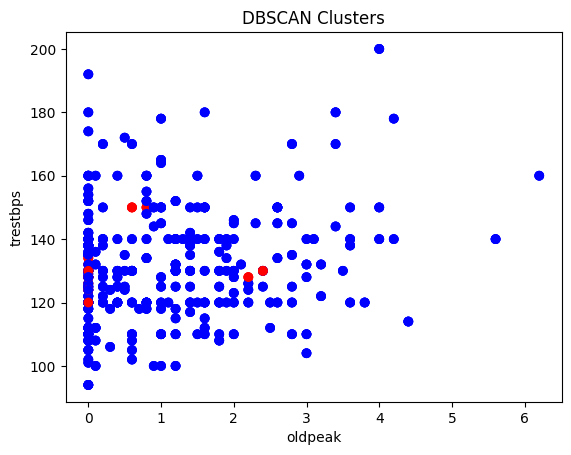

In [ ]:
from matplotlib.colors import ListedColormap
custom_colors = ['blue', 'red']
custom_cmap = ListedColormap(custom_colors)

plt.scatter(oldpeak, trestbps, c=clusters, cmap=custom_cmap)
plt.xlabel('oldpeak')
plt.ylabel('trestbps')
plt.title('DBSCAN Clusters')
plt.show()
